# **Sentiment Elicitation: Exploratory Data Analysis on Amazon Reviews**



In [ ]:
#Essential libraries for data handling, visualization, and processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import warnings
warnings.filterwarnings("ignore")


In [ ]:
!gdown https://drive.google.com/uc?id=16hIUUfze_HUb-JE1Yxdt-akxjQlhVmQb -O /content/Reviews.csv


Downloading...
From (original): https://drive.google.com/uc?id=16hIUUfze_HUb-JE1Yxdt-akxjQlhVmQb
From (redirected): https://drive.google.com/uc?id=16hIUUfze_HUb-JE1Yxdt-akxjQlhVmQb&confirm=t&uuid=b6ce354e-3601-483a-a8ff-11f101086579
To: /content/Reviews.csv
100% 301M/301M [00:05<00:00, 51.3MB/s]


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/Reviews.csv')

# Display the first few rows
print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [ ]:
df = pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Visualization of Sentiment Distribution in Amazon Reviews

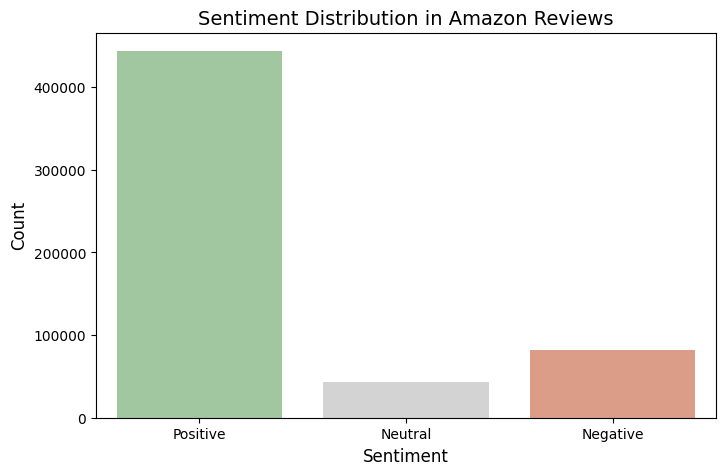

In [ ]:
def get_sentiment(score):
    """categorizing sentiment based on review score."""
    if score >= 4:
        return "Positive"
    elif score == 3:
        return "Neutral"
    else:
        return "Negative"

# applying the sentiment function
df["Sentiment"] = df["Score"].apply(get_sentiment)

# converting to categorical
df["Sentiment"] = pd.Categorical(df["Sentiment"], categories=["Negative", "Neutral", "Positive"], ordered=True)

plt.figure(figsize=(8, 5))

# count plot
sns.countplot(x=df["Sentiment"], palette={"Positive": "#9ACD9A", "Neutral": "#D3D3D3", "Negative": "#E9967A"}, order=["Positive", "Neutral", "Negative"])

plt.title("Sentiment Distribution in Amazon Reviews", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

Amazon reviews are largely positive, reflecting overall customer satisfaction. Neutral and negative reviews, though fewer, may highlight areas for improvement.

# Visualization of Sentiment Distribution Over the Years (Log Scale)

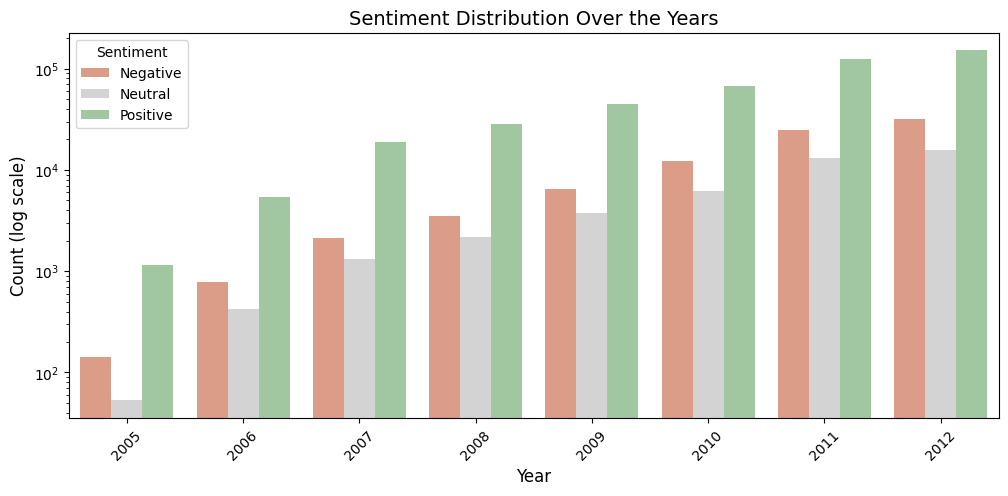

In [ ]:
df["Review_Date"] = pd.to_datetime(df["Time"], unit="s")
df["Year"] = df["Review_Date"].dt.year

# filtering data from 2005 onwards for better analysis/clarity
df_filtered = df[df["Year"] >= 2005]

plt.figure(figsize=(12, 5))
ax = sns.countplot(x="Year", hue="Sentiment", data=df_filtered, palette={"Positive": "#9ACD9A", "Neutral": "#D3D3D3", "Negative": "#E9967A"}

)

plt.title("Sentiment Distribution Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count (log scale)", fontsize=12)
plt.yscale("log")  # log scale for visibilty

plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()

# **Initial Results on Amazon Reviews**

*   List item
*   List item





After performing exploratory data analysis on the Amazon reviews dataset, we experimented with three models for sentiment elicitation:

**CNN with GloVe embeddings** was chosen for its ability to capture sequential dependencies in text using pre-trained word vectors.

**DistilBERT** offered a lighter and faster transformer-based alternative while retaining strong contextual understanding.

**RoBERTa** provided a more robust transformer model with enhanced pretraining, often leading to higher accuracy.

Each model was selected to balance performance, interpretability, and computational efficiency.

## RoBERTa in PyTorch

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3)
model = model.to(device)

def clean_text(text):
    return str(text).replace('\n', ' ').strip()


class SimpleDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }


def load_data():
    df = pd.read_csv("Reviews.csv").dropna(subset=["Text", "Score"]).sample(1000)  # small subset
    df["Text"] = df["Text"].apply(clean_text)
    df["Label"] = df["Score"].apply(lambda x: 0 if x <= 2 else (1 if x == 3 else 2))
    return train_test_split(df["Text"].tolist(), df["Label"].tolist(), test_size=0.2)


def train(model, dataloader):
    model.train()
    optimizer = AdamW(model.parameters(), lr=2e-5)

    for batch in tqdm(dataloader, desc="Training"):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()


def evaluate(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {acc:.4f}")


def main():
    print("Loading and preprocessing...")
    X_train, X_test, y_train, y_test = load_data()

    train_ds = SimpleDataset(X_train, y_train, tokenizer)
    test_ds = SimpleDataset(X_test, y_test, tokenizer)

    train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
    test_dl = DataLoader(test_ds, batch_size=8)

    print("Training model...")
    train(model, train_dl)

    print("Evaluating model...")
    evaluate(model, test_dl)

if __name__ == "__main__":
    main()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading and preprocessing...
Training model...


Training: 100%|██████████| 100/100 [17:09<00:00, 10.30s/it]


Evaluating model...


Evaluating: 100%|██████████| 25/25 [01:15<00:00,  3.00s/it]

Accuracy: 0.7750


NOW below code to visualise our model training and predicting class

Loading and preprocessing...
Training model...


Training: 100%|██████████| 100/100 [17:06<00:00, 10.27s/it]


Evaluating model...


Evaluating: 100%|██████████| 25/25 [01:13<00:00,  2.95s/it]


Accuracy: 0.8350


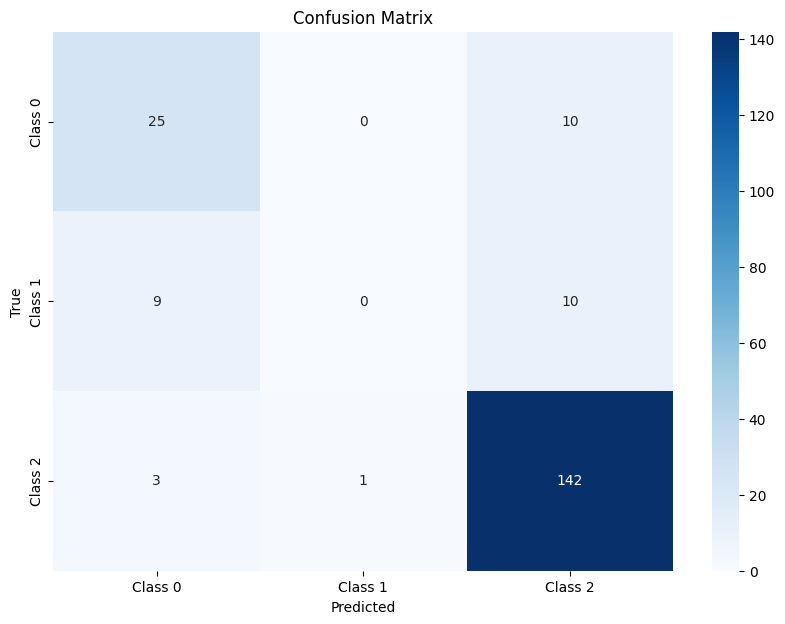

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.71      0.69        35
           1       0.00      0.00      0.00        19
           2       0.88      0.97      0.92       146

    accuracy                           0.83       200
   macro avg       0.52      0.56      0.54       200
weighted avg       0.76      0.83      0.79       200



ValueError: multiclass format is not supported

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import torch.nn.functional as F


def evaluate(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []

    num_classes = 3

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            probs = F.softmax(outputs.logits, dim=1)
            preds = torch.argmax(probs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())


    acc = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {acc:.4f}")

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Class {i}' for i in range(num_classes)],
                yticklabels=[f'Class {i}' for i in range(num_classes)])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


    print("Classification Report:\n", classification_report(all_labels, all_preds))

    y_true_bin = label_binarize(all_labels, classes=[i for i in range(num_classes)])
    y_score = all_probs


    try:
        macro_roc_auc = roc_auc_score(y_true_bin, y_score, average='macro', multi_class='ovr')
        print(f"Macro-average ROC AUC: {macro_roc_auc:.4f}")
    except ValueError as e:
        print(f"ROC AUC could not be calculated: {e}")
        return


    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves by Class')
    plt.legend(loc="lower right")
    plt.show()



def main():
    print("Loading and preprocessing...")
    X_train, X_test, y_train, y_test = load_data()

    train_ds = SimpleDataset(X_train, y_train, tokenizer)
    test_ds = SimpleDataset(X_test, y_test, tokenizer)

    train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
    test_dl = DataLoader(test_ds, batch_size=8)

    print("Training model...")
    train(model, train_dl)

    print("Evaluating model...")
    evaluate(model, test_dl)

if __name__ == "__main__":
    main()


## Sentiment Classification of Amazon Reviews using CNN and GloVe Embeddings

Training: 100%|██████████| 38/38 [00:00<00:00, 48.09it/s]


Accuracy: 0.4
              precision    recall  f1-score   support

           0       0.86      0.11      0.19       110
           1       0.36      1.00      0.53       100
           2       0.89      0.09      0.16        90

    accuracy                           0.40       300
   macro avg       0.70      0.40      0.30       300
weighted avg       0.70      0.40      0.30       300



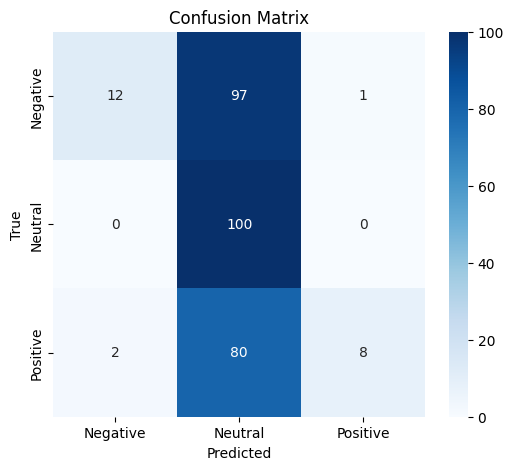

In [ ]:
# Install dependencies (run only once)
!pip install pandas scikit-learn tqdm

# CNN with GloVe Embeddings for Sentiment Classification
import pandas as pd, numpy as np, torch, torch.nn as nn, torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import re, os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Preprocessing & Dataset
def clean_text(text):
    return re.sub(r"[^a-zA-Z0-9\s]", "", str(text)).strip().lower()

class Vocab:
    def __init__(self):
        self.word2idx = {"<PAD>": 0, "<UNK>": 1}
        self.idx2word = ["<PAD>", "<UNK>"]

    def build_vocab(self, texts):
        for text in texts:
            for word in text.split():
                if word not in self.word2idx:
                    self.word2idx[word] = len(self.idx2word)
                    self.idx2word.append(word)

    def text_to_seq(self, text, max_len=100):
        tokens = text.split()
        seq = [self.word2idx.get(word, 1) for word in tokens[:max_len]]
        return seq + [0] * (max_len - len(seq))

class ReviewDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_len=100):
        self.sequences = [vocab.text_to_seq(clean_text(t), max_len) for t in texts]
        self.labels = labels

    def __len__(self): return len(self.labels)

    def __getitem__(self, idx):
        return {
            "input": torch.tensor(self.sequences[idx], dtype=torch.long),
            "label": torch.tensor(self.labels[idx], dtype=torch.long)
        }


class CNNClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, output_dim, embeddings):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.embedding.weight.data.copy_(torch.tensor(embeddings))
        self.embedding.weight.requires_grad = False
        self.conv1 = nn.Conv1d(embedding_dim, 100, kernel_size=3)
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Linear(100, output_dim)

    def forward(self, x):
        x = self.embedding(x).permute(0, 2, 1)  # [batch, embed_dim, seq_len]
        x = F.relu(self.conv1(x))
        x = self.pool(x).squeeze(-1)
        return self.fc(x)

def load_glove(path='glove.6B.100d.txt'):
    if not os.path.exists(path):
        !wget http://nlp.stanford.edu/data/glove.6B.zip && unzip glove.6B.zip
    embeddings = {}
    with open(path, encoding='utf8') as f:
        for line in f:
            values = line.split()
            word, vector = values[0], np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings


def load_data():
    df = pd.read_csv("Reviews.csv", on_bad_lines='skip', encoding='utf-8', engine='python')
    df = df.dropna(subset=["Text", "Score"]).sample(3000, random_state=42)
    df["Text"] = df["Text"].apply(clean_text)
    df["Label"] = df["Score"].apply(lambda x: 0 if x <= 2 else (1 if x == 3 else 2))

    # Rebalance the classes using oversampling
    dfs = []
    samples_per_class = 500  # Make it small for speed
    for label in df["Label"].unique():
        subset = df[df["Label"] == label]
        upsampled = subset.sample(n=samples_per_class, replace=True, random_state=42)
        dfs.append(upsampled)
    df_bal = pd.concat(dfs).sample(frac=1, random_state=42)

    return train_test_split(df_bal["Text"].tolist(), df_bal["Label"].tolist(), test_size=0.2)


# training and evaluation
def train(model, loader, optimizer, criterion):
    model.train()
    for batch in tqdm(loader, desc="Training"):
        inputs = batch["input"].to(device)
        labels = batch["label"].to(device)
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

def evaluate(model, loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in loader:
            inputs = batch["input"].to(device)
            labels = batch["label"].to(device)
            preds = model(inputs).argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    print("Accuracy:", accuracy_score(all_labels, all_preds))
    print(classification_report(all_labels, all_preds))


X_train, X_test, y_train, y_test = load_data()
vocab = Vocab(); vocab.build_vocab(X_train + X_test)
glove = load_glove()
embedding_dim = 100
vocab_size = len(vocab.idx2word)

# embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for i, word in enumerate(vocab.idx2word):
    if word in glove: embedding_matrix[i] = glove[word]

train_ds = ReviewDataset(X_train, y_train, vocab)
test_ds = ReviewDataset(X_test, y_test, vocab)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=32)

model = CNNClassifier(vocab_size, embedding_dim, output_dim=3, embeddings=embedding_matrix).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train(model, train_dl, optimizer, criterion)
evaluate(model, test_dl)

all_preds, all_labels = [], []
model.eval()
with torch.no_grad():
    for batch in test_dl:
        inputs = batch["input"].to(device)
        labels = batch["label"].to(device)
        preds = model(inputs).argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## **DistilBERT with Hugging Face Transformers**
We fine-tuned a DistilBERT model on a 5k-row subset of Amazon reviews for three-class sentiment classification.Despite limited training time, the model performed well and generalised across positive, neutral, and negative sentiment categories.



In [ ]:
!pip install transformers datasets
!pip install -U "transformers[torch]" "accelerate>=0.26.0"



import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict

df_sample = df[['Text', 'Sentiment']].dropna().sample(n=5000, random_state=42).copy()

le = LabelEncoder()
df_sample['label'] = le.fit_transform(df_sample['Sentiment'])  # 'negative' = 0, 'neutral' = 1, 'positive' = 2
df_sample = df_sample.rename(columns={'Text': 'text'})

# train and test splitting
train_df, test_df = train_test_split(df_sample, test_size=0.2, stratify=df_sample['label'], random_state=42)

dataset = DatasetDict({
    "train": Dataset.from_pandas(train_df.reset_index(drop=True)),
    "test": Dataset.from_pandas(test_df.reset_index(drop=True)),
})

tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=64)

dataset = dataset.map(tokenize, batched=True)

# model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

training_args = TrainingArguments(
    output_dir="./distilbert-fast",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    logging_dir="./logs",
    save_strategy="no",
    disable_tqdm=False,
    eval_steps=500
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=tokenizer,
)

# training the model
trainer.train()

# evaluating the model
trainer.evaluate()



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


{'eval_loss': 0.4530780017375946,
 'eval_runtime': 34.8143,
 'eval_samples_per_second': 28.724,
 'eval_steps_per_second': 1.81,
 'epoch': 1.0}

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(p):
    predictions, labels = p
    preds = predictions.argmax(axis=1)  # predicted labels

    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()

eval_results = trainer.evaluate()


eval_df = pd.DataFrame([eval_results])

print(eval_df)


Step,Training Loss


   eval_loss  eval_accuracy  eval_precision  eval_recall   eval_f1  \
0   0.479658          0.834        0.815047        0.834  0.817439   

   eval_runtime  eval_samples_per_second  eval_steps_per_second  epoch  
0       34.2082                   29.233                  1.842    1.0  


Confusion Matrix

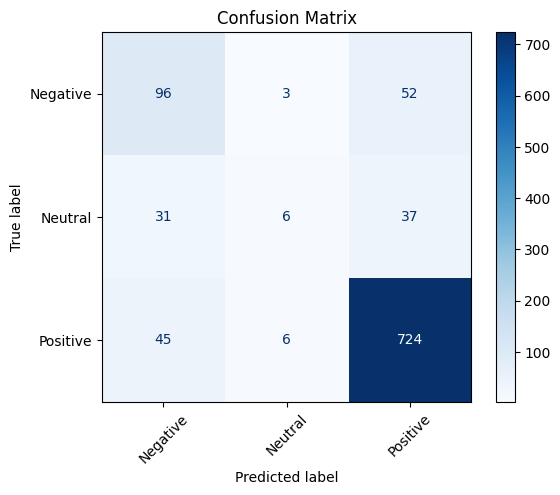

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# model predictions
predictions = trainer.predict(dataset["test"])
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# confusion matrix
cm = confusion_matrix(labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

Per-Class Precision, Recall & F1-Score

<Figure size 800x600 with 0 Axes>

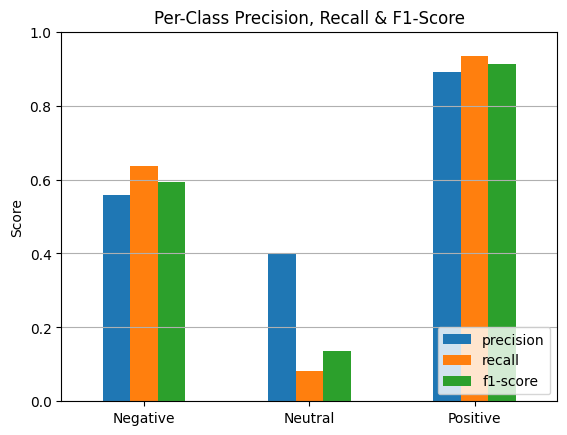

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns

report_dict = classification_report(labels, preds, target_names=le.classes_, output_dict=True)

df_report = pd.DataFrame(report_dict).transpose().iloc[:3]

plt.figure(figsize=(8, 6))
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title("Per-Class Precision, Recall & F1-Score")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

Macro vs Weighted Average Scores

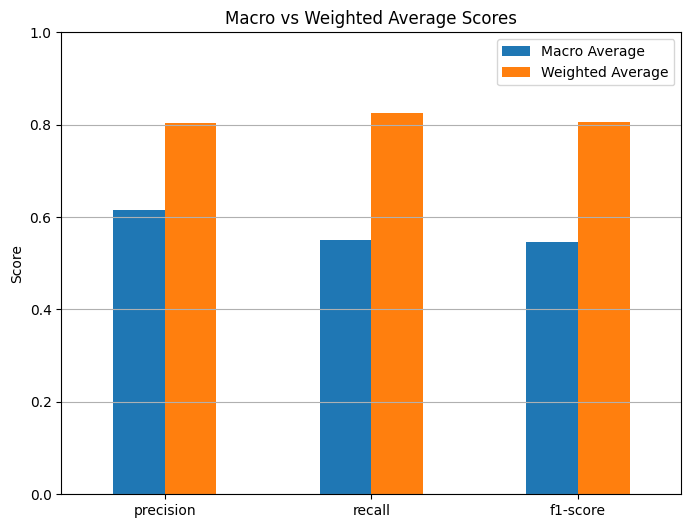

In [ ]:
macro = pd.Series(report_dict['macro avg'])[['precision', 'recall', 'f1-score']]
weighted = pd.Series(report_dict['weighted avg'])[['precision', 'recall', 'f1-score']]

avg_df = pd.DataFrame({
    'Macro Average': macro,
    'Weighted Average': weighted
})

avg_df.plot(kind='bar', figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])
plt.title("Macro vs Weighted Average Scores")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.show()

# Final Results




In [ ]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Fine-Tuning DistilBERT for Multi-Class Sentiment Classification with Class Balancing and Evaluation Visualization**

In [ ]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

Original class distribution:
Sentiment
Positive    3874
Negative     756
Neutral      370
Name: count, dtype: int64
Label mapping: {'Negative': 0, 'Neutral': 1, 'Positive': 2}

Class distribution after encoding:
label
2    3874
0     756
1     370
Name: count, dtype: int64


Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]


Class weights: [5.122314049586777, 10.469594594594595, 1.0]


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Identified neutral class as index: 1
Oversampling neutral class by factor of 10
New train set size: 6664
New class distribution:
label
2    3099
1    2960
0     605
Name: count, dtype: int64


Map:   0%|          | 0/6664 [00:00<?, ? examples/s]


Training model...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
500,0.499200
1000,0.158000



Evaluating model...


Trainer is attempting to log a value of "[[ 96  15  40]
 [ 20  22  32]
 [ 31  27 717]]" of type <class 'numpy.ndarray'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.



Evaluation Results:
eval_loss: 0.6725
eval_accuracy: 0.8350
eval_precision: 0.8283
eval_recall: 0.8350
eval_f1: 0.8315
eval_confusion_matrix: [[ 96  15  40]
 [ 20  22  32]
 [ 31  27 717]]
eval_f1_Negative: 0.6443
eval_f1_Neutral: 0.3188
eval_f1_Positive: 0.9169
eval_runtime: 1.7688
eval_samples_per_second: 565.3470
eval_steps_per_second: 35.6170
epoch: 3.0000


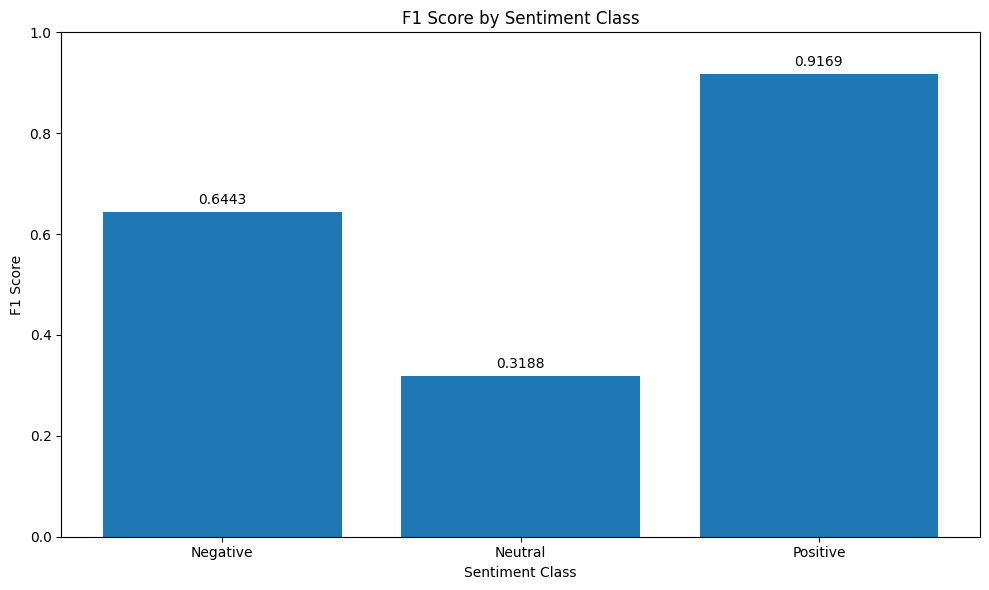

KeyError: 'accuracy'

In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict

df_sample = df[['Text', 'Sentiment']].dropna().sample(n=5000, random_state=42).copy()

print("Original class distribution:")
print(df_sample['Sentiment'].value_counts())

le = LabelEncoder()
df_sample['label'] = le.fit_transform(df_sample['Sentiment'])
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(f"Label mapping: {label_mapping}")

print("\nClass distribution after encoding:")
print(df_sample['label'].value_counts())

df_sample = df_sample.rename(columns={'Text': 'text'})

train_df, test_df = train_test_split(df_sample, test_size=0.2, stratify=df_sample['label'], random_state=42)

dataset = DatasetDict({
    "train": Dataset.from_pandas(train_df.reset_index(drop=True)),
    "test": Dataset.from_pandas(test_df.reset_index(drop=True)),
})

tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=64)


tokenized_dataset = dataset.map(tokenize, batched=True)

train_class_counts = train_df['label'].value_counts().sort_index()
total_samples = len(train_df)
class_weights = total_samples / (len(train_class_counts) * train_class_counts)
class_weights = class_weights / class_weights.min()
print(f"\nClass weights: {class_weights.tolist()}")

model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=len(le.classes_)
)

training_args = TrainingArguments(
    output_dir="./distilbert-improved",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    logging_dir="./logs",
    save_strategy="no",
    disable_tqdm=False,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    conf_mat = confusion_matrix(labels, preds)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    accuracy = accuracy_score(labels, preds)

    cls_report = classification_report(labels, preds, target_names=le.classes_, output_dict=True)

    class_f1 = {f"f1_{le.classes_[i]}": cls_report[le.classes_[i]]['f1-score'] for i in range(len(le.classes_))}

    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': conf_mat,
        **class_f1
    }

    return metrics

def model_init():
    model = DistilBertForSequenceClassification.from_pretrained(
        "distilbert-base-uncased",
        num_labels=len(le.classes_)
    )
    return model

trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

neutral_idx = None
for cls_name, idx in label_mapping.items():
    if 'neutral' in cls_name.lower():
        neutral_idx = idx
        break

if neutral_idx is not None:
    print(f"Identified neutral class as index: {neutral_idx}")

    neutral_indices = train_df[train_df['label'] == neutral_idx].index.tolist()

    largest_class_count = train_df['label'].value_counts().max()
    neutral_count = train_df['label'].value_counts()[neutral_idx]
    oversample_factor = int(largest_class_count / neutral_count)

    if oversample_factor > 1:
        print(f"Oversampling neutral class by factor of {oversample_factor}")

        additional_neutral_samples = train_df.loc[neutral_indices].sample(
            n=neutral_count * (oversample_factor - 1),
            replace=True,
            random_state=42
        )

        oversampled_train_df = pd.concat([train_df, additional_neutral_samples])
        print(f"New train set size: {len(oversampled_train_df)}")
        print(f"New class distribution:")
        print(oversampled_train_df['label'].value_counts())

        oversampled_dataset = Dataset.from_pandas(oversampled_train_df.reset_index(drop=True))
        tokenized_oversampled = oversampled_dataset.map(tokenize, batched=True)

        trainer.train_dataset = tokenized_oversampled
else:
    print("Could not identify neutral class. Using original dataset.")

print("\nTraining model...")
trainer.train()

print("\nEvaluating model...")
eval_results = trainer.evaluate()

print("\nEvaluation Results:")

for key, value in eval_results.items():
    if key == 'confusion_matrix':
        continue
    if isinstance(value, (int, float)):
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")


conf_mat = eval_results['eval_confusion_matrix']
class_names = le.classes_

plt.figure(figsize=(10, 8))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = conf_mat.max() / 2
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(j, i, format(conf_mat[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_mat[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix.png')
plt.close()

f1_scores = {c: eval_results[f'eval_f1_{c}'] for c in class_names}

plt.figure(figsize=(10, 6))
bars = plt.bar(f1_scores.keys(), f1_scores.values())

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom')

plt.title('F1 Score by Sentiment Class')
plt.ylim(0, 1.0)
plt.ylabel('F1 Score')
plt.xlabel('Sentiment Class')
plt.tight_layout()
plt.savefig('f1_scores.png')
plt.show()


In [ ]:
print(f"\nFinal Model Accuracy: {eval_results['eval_accuracy']:.4f}")
print(f"F1 Score: {eval_results['eval_f1']:.4f}")

print("\nClass-wise F1 Scores:")
for class_name in class_names:
    print(f"{class_name}: {eval_results[f'eval_f1_{class_name}']:.4f}")


def predict_sentiment(text):
    encoding = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=64)
    encoding = {k: v.to(trainer.model.device) for k, v in encoding.items()}
    with torch.no_grad():
        outputs = trainer.model(**encoding)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()
    return le.classes_[predicted_class]

example_texts = [
    "I absolutely loved this product! It exceeded all my expectations.",
    "It's okay, nothing special but gets the job done.",
    "This is the worst purchase I've ever made. Don't waste your money."
]

print("\nTesting model with example texts:")
for text in example_texts:
    sentiment = predict_sentiment(text)
    print(f"Text: {text}\nPredicted sentiment: {sentiment}\n")


Final Model Accuracy: 0.8350
F1 Score: 0.8315

Class-wise F1 Scores:
Negative: 0.6443
Neutral: 0.3188
Positive: 0.9169

Testing model with example texts:
Text: I absolutely loved this product! It exceeded all my expectations.
Predicted sentiment: Positive

Text: It's okay, nothing special but gets the job done.
Predicted sentiment: Neutral

Text: This is the worst purchase I've ever made. Don't waste your money.
Predicted sentiment: Negative



**Sentiment Classification with DistilBERT: Text Preprocessing, Class Balancing, and Weighted Training**

In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

Preprocessing text data...
Original class distribution:
Sentiment
Positive    7750
Negative    1486
Neutral      764
Name: count, dtype: int64
Label mapping: {'Negative': 0, 'Neutral': 1, 'Positive': 2}

Class distribution after encoding:
label
2    7750
0    1486
1     764
Name: count, dtype: int64

Balanced class distribution:
label
2    7750
1    3875
0    3875
Name: count, dtype: int64
Tokenizing datasets...


Map:   0%|          | 0/12400 [00:00<?, ? examples/s]

Map:   0%|          | 0/3100 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training model...
Error in weighted training: WeightedTrainer.compute_loss() got an unexpected keyword argument 'num_items_in_batch'
Falling back to standard trainer...


Step,Training Loss
100,1.080900
200,0.823700
300,0.678900
400,0.631000
500,0.550200
600,0.511000
700,0.483800
800,0.354500
900,0.291600
1000,0.276700


Step,Training Loss
100,1.080900
200,0.823700
300,0.678900
400,0.631000
500,0.550200
600,0.511000
700,0.483800
800,0.354500
900,0.291600
1000,0.276700



Evaluating model...



Evaluation Results:
eval_accuracy: 0.9552
eval_precision: 0.9571
eval_recall: 0.9552
eval_f1: 0.9553
eval_f1_Negative: 0.9663
eval_f1_Neutral: 0.9399
eval_f1_Positive: 0.9575
eval_loss: 0.2284
eval_runtime: 10.1319
eval_samples_per_second: 305.9630
eval_steps_per_second: 9.5740
epoch: 5.0000

Final Model Performance:
Accuracy: 0.9552
F1 Score (Weighted): 0.9553

Class-wise F1 Scores:
Negative: 0.9663
Neutral: 0.9399
Positive: 0.9575

Testing model with example texts:


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper_CUDA__index_select)

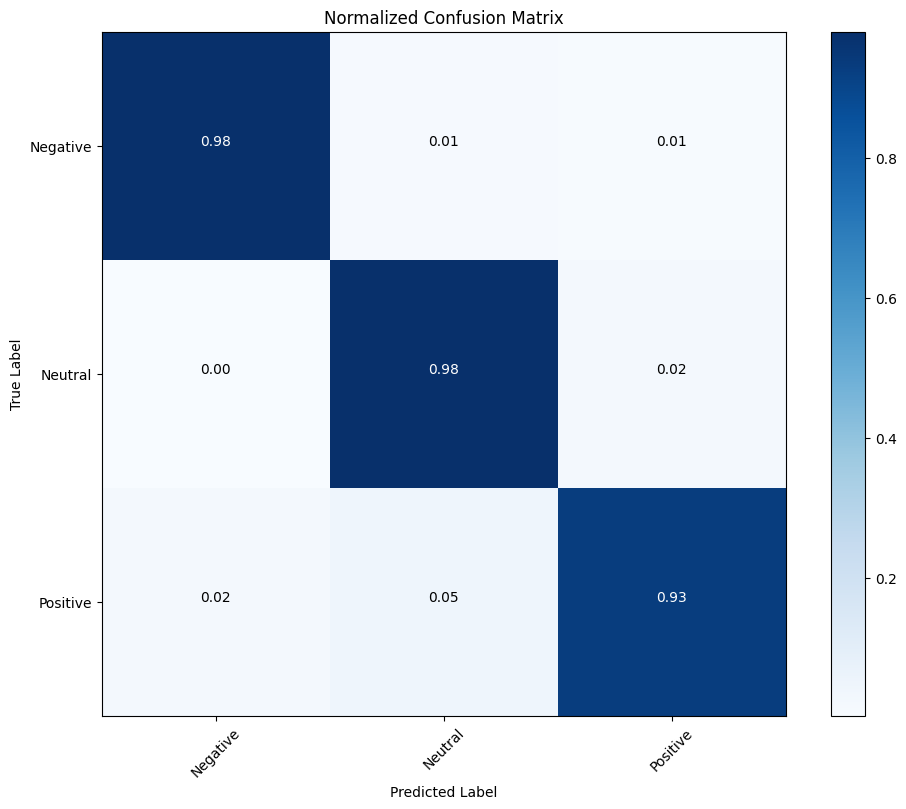

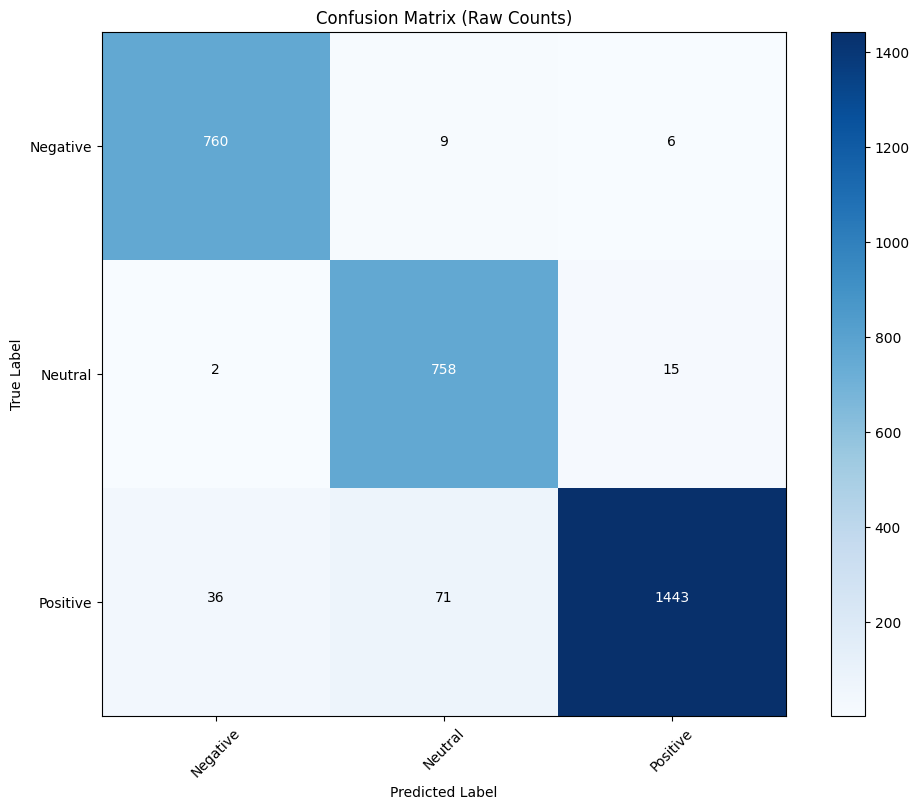

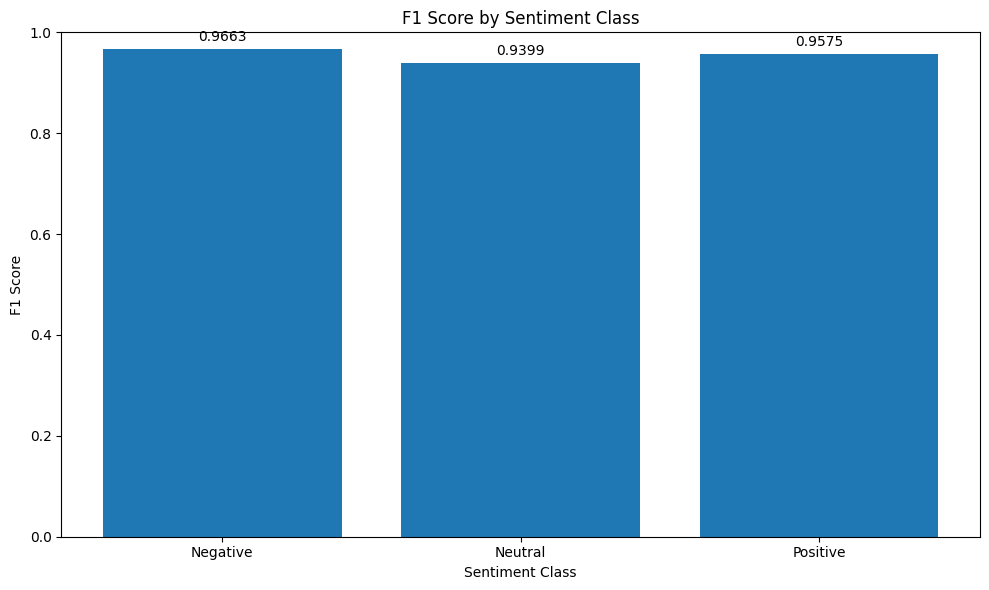

In [ ]:

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

def preprocess_text(text):
    """Clean and preprocess text for better sentiment analysis."""
    if not isinstance(text, str):
        return ""

    text = text.lower()

    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    text = re.sub(r'<.*?>', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = re.sub(r'\s+', ' ', text).strip()

    return text


df_sample = df[['Text', 'Sentiment']].dropna().copy()

if len(df_sample) > 10000:
    df_sample = df_sample.sample(n=10000, random_state=42)

df_sample['processed_text'] = df_sample['Text'].apply(preprocess_text)

df_sample = df_sample[df_sample['processed_text'].str.len() > 0].reset_index(drop=True)

print("Original class distribution:")
print(df_sample['Sentiment'].value_counts())

le = LabelEncoder()
df_sample['label'] = le.fit_transform(df_sample['Sentiment'])
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(f"Label mapping: {label_mapping}")

print("\nClass distribution after encoding:")
print(df_sample['label'].value_counts())

df_sample = df_sample.rename(columns={'processed_text': 'text'})

def balance_classes(df, min_ratio=0.5):
    class_counts = df['label'].value_counts()
    max_count = class_counts.max()
    min_samples = int(max_count * min_ratio)

    balanced_dfs = []

    for label, count in class_counts.items():
        class_df = df[df['label'] == label]

        if count < min_samples:
            resampled = class_df.sample(min_samples, replace=True, random_state=42)
            balanced_dfs.append(resampled)
        else:
            balanced_dfs.append(class_df)

    return pd.concat(balanced_dfs).sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced = balance_classes(df_sample)
print("\nBalanced class distribution:")
print(df_balanced['label'].value_counts())

train_df, test_df = train_test_split(df_balanced, test_size=0.2, stratify=df_balanced['label'], random_state=42)

dataset = DatasetDict({
    "train": Dataset.from_pandas(train_df.reset_index(drop=True)),
    "test": Dataset.from_pandas(test_df.reset_index(drop=True)),
})

tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

def tokenize(batch):
    return tokenizer(
        batch["text"],
        padding="max_length",
        truncation=True,
        max_length=128
    )


print("Tokenizing datasets...")
tokenized_dataset = dataset.map(tokenize, batched=True)

training_args = TrainingArguments(
    output_dir="./distilbert-high-performance",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    logging_dir="./logs",
    metric_for_best_model="f1",
    logging_steps=100,
    weight_decay=0.01,
    learning_rate=3e-5,
    warmup_ratio=0.1,
    fp16=False,
    report_to="none",
)


def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    conf_mat = confusion_matrix(labels, preds)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    accuracy = accuracy_score(labels, preds)

    cls_report = classification_report(labels, preds, target_names=le.classes_, output_dict=True)

    class_f1_scores = {}
    for i, class_name in enumerate(le.classes_):
        class_f1_scores[f"eval_f1_{class_name}"] = cls_report[class_name]['f1-score']

    metrics = {
        'eval_accuracy': accuracy,
        'eval_precision': precision,
        'eval_recall': recall,
        'eval_f1': f1,
        'eval_confusion_matrix': conf_mat,
        **class_f1_scores
    }

    return metrics

def create_weighted_model():
    class_distribution = train_df['label'].value_counts().sort_index()
    total_samples = len(train_df)
    num_classes = len(class_distribution)
    class_weights = total_samples / (num_classes * class_distribution)
    class_weights = torch.tensor(class_weights.values / class_weights.min())

    model = DistilBertForSequenceClassification.from_pretrained(
        "distilbert-base-uncased",
        num_labels=len(le.classes_),
        problem_type="single_label_classification"
    )

    model.config.class_weights = class_weights.tolist()

    return model

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        class_weights = torch.tensor(model.config.class_weights, device=model.device)
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

model = create_weighted_model()

trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

print("\nTraining model...")
try:
    trainer.train()
except Exception as e:
    print(f"Error in weighted training: {e}")
    print("Falling back to standard trainer...")

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_dataset["train"],
        eval_dataset=tokenized_dataset["test"],
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
    )
    trainer.train()

print("\nEvaluating model...")
eval_results = trainer.evaluate()

print("\nEvaluation Results:")
for key, value in eval_results.items():
    if key == 'eval_confusion_matrix':
        continue
    if isinstance(value, (int, float)):
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")

conf_mat = eval_results['eval_confusion_matrix']
class_names = le.classes_

plt.figure(figsize=(10, 8))
conf_mat_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
plt.imshow(conf_mat_norm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = conf_mat_norm.max() / 2
for i in range(conf_mat_norm.shape[0]):
    for j in range(conf_mat_norm.shape[1]):
        plt.text(j, i, format(conf_mat_norm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if conf_mat_norm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_normalized.png')

plt.figure(figsize=(10, 8))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Raw Counts)')
plt.colorbar()
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = conf_mat.max() / 2
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(j, i, format(conf_mat[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_mat[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_raw.png')

f1_scores = {c: eval_results[f'eval_f1_{c}'] for c in class_names}
plt.figure(figsize=(10, 6))
bars = plt.bar(f1_scores.keys(), f1_scores.values())

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom')

plt.title('F1 Score by Sentiment Class')
plt.ylim(0, 1.0)
plt.ylabel('F1 Score')
plt.xlabel('Sentiment Class')
plt.tight_layout()
plt.savefig('f1_scores.png')

print(f"\nFinal Model Performance:")
print(f"Accuracy: {eval_results['eval_accuracy']:.4f}")
print(f"F1 Score (Weighted): {eval_results['eval_f1']:.4f}")
print("\nClass-wise F1 Scores:")
for class_name in class_names:
    print(f"{class_name}: {eval_results[f'eval_f1_{class_name}']:.4f}")


def predict_sentiment(text):
    cleaned_text = preprocess_text(text)

    encoding = tokenizer(cleaned_text, return_tensors='pt', padding=True, truncation=True, max_length=128)

    with torch.no_grad():
        outputs = trainer.model(**encoding)

    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()

    probs = torch.nn.functional.softmax(logits, dim=1)[0]
    confidence = probs[predicted_class].item()

    return {
        'sentiment': le.classes_[predicted_class],
        'confidence': confidence,
        'all_probs': {le.classes_[i]: probs[i].item() for i in range(len(le.classes_))}
    }


example_texts = [
    "I absolutely loved this product! It exceeded all my expectations.",
    "It's okay, nothing special but gets the job done.",
    "This is the worst purchase I've ever made. Don't waste your money.",
    "Product arrived on time and works as expected.",
    "Not great, not terrible. It's just average."
]

print("\nTesting model with example texts:")
for text in example_texts:
    result = predict_sentiment(text)
    print(f"Text: {text}")
    print(f"Predicted sentiment: {result['sentiment']} (Confidence: {result['confidence']:.4f})")
    print("All probabilities:", {k: f"{v:.4f}" for k, v in result['all_probs'].items()})
    print()

output_dir = "./final_sentiment_model"
trainer.save_model(output_dir)
tokenizer.save_pretrained(output_dir)

import pickle
with open(f"{output_dir}/label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)
print("Label encoder mapping saved")